In [131]:
# Tecnica de analisis multidimensional
from sklearn.manifold import MDS # Importamos la libreria
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import euclidean_distances

In [132]:
df = pd.read_excel("../databases/EMD.xlsx")
df.head(20)

,FILAID,Aspecto,Flexibilidad,Sabor,Color,Aroma,Consistencia
0,Lenguado,3.813398,0.438920,2.628878,0.944778,4.331075,1.529661
1,Palometa,0.124608,3.001814,0.647716,3.415188,3.037923,0.562265
2,Jurel,2.273428,3.551412,0.293779,2.775940,4.062515,1.046730
3,Pez espada,0.697422,1.095634,0.461087,0.684837,3.301972,0.514008
4,Lubina,3.689734,3.422783,4.243104,3.020102,4.655982,3.539164
5,Rape,4.423794,2.330776,4.049592,3.646433,4.410111,1.713514
6,Caballa,1.554341,3.468717,0.864822,4.028649,4.230400,0.585882
7,Besugo,3.425659,3.068807,3.686180,2.362374,4.040060,1.714948
8,Merluza,1.279157,1.369601,1.588690,1.248103,2.633786,1.460293
9,Bacalao,2.152061,2.479908,0.544554,2.929282,3.844208,0.588848


In [133]:
labels = df["FILAID"]
df = df.drop(columns=["FILAID"])

In [134]:
scaler = StandardScaler()
scaler.fit(df)
X_scaled = scaler.transform(df)

dist_matrix = euclidean_distances(X_scaled)

In [135]:
mds = MDS(n_components=2, metric=False, dissimilarity="precomputed", random_state=1)
X_mds = mds.fit_transform(dist_matrix)

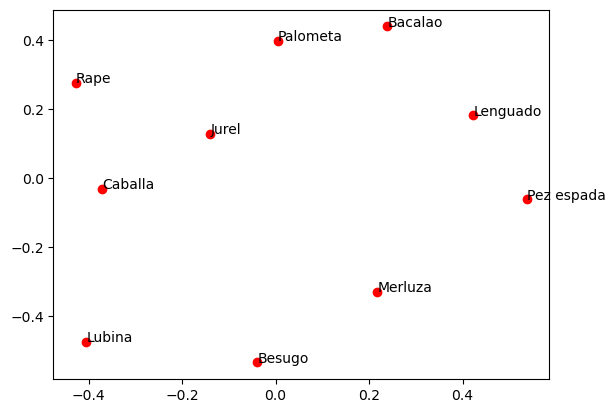

In [136]:
plt.scatter(X_mds[:,0], X_mds[:,1], c="red")
for i, txt in enumerate(labels):
    plt.annotate(txt, (X_mds[i,0], X_mds[i,1]))
plt.show()

In [137]:
stress = mds.stress_
print(f"El valor de stress es: {stress:.2f}")

El valor de stress es: 0.21


Menor a 0.3 es bueno, entre 0.3 y 0.5 mas o menos, mayor a 0.6 malo

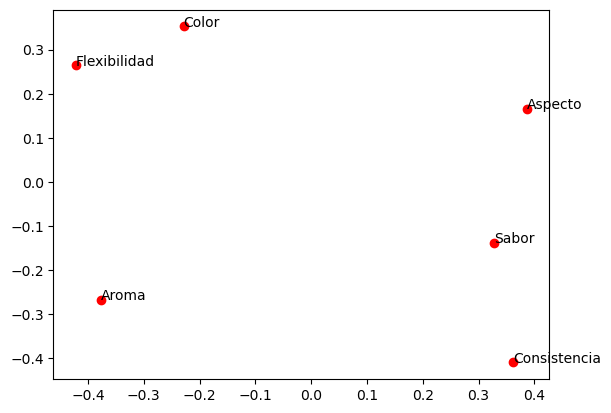

In [138]:
import numpy as np

correlation_matrix = np.corrcoef(X_scaled.T)

dist_matrix = 1 - correlation_matrix

mds = MDS(n_components=2, metric=False, dissimilarity="precomputed", random_state=1)
X_mds = mds.fit_transform(dist_matrix)

plt.scatter(X_mds[:,0], X_mds[:,1], c="red")
for i, var_name in enumerate(df.columns):
    plt.text(X_mds[i,0], X_mds[i,1], var_name)
plt.show()

In [139]:
stress = mds.stress_
print(f"El valor de stress es: {stress:.2f}")

El valor de stress es: 0.11
